<a href="https://colab.research.google.com/github/shrutishibu/Entab-Internship/blob/main/Customer_complaint_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #for cleaning raw data
import matplotlib.pyplot as plt #visualizing data
from sklearn.feature_extraction.text import CountVectorizer #converting textual data into numeric data
from sklearn.naive_bayes import MultinomialNB #classifying complaints into categories
from sklearn.pipeline import make_pipeline #making models easily by pipelining conversion into numeric data and classification into categories
from sklearn.model_selection import train_test_split #splitting into training and testing datasets
from sklearn.metrics import classification_report #evaluating model's performance using F1 score, accuracy
from textblob import TextBlob #for sentiment analysis
import seaborn as sns #visualizing data


In [ ]:
#load raw dataset of complaints(csv)
data = pd.read_csv('complaints.csv')
data.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 754: invalid start byte

In [ ]:
print("Initial shape of data: ", data.shape)

Initial shape of data:  (12, 2)


In [ ]:
#cleaning of data
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data['date'] = pd.to_datetime(data['date'])
data['complaint'] = data['complaint'].str.lower()
print("Shape of data after cleaning :", data.shape)

Shape of data after cleaning : (12, 2)


In [ ]:
#defining modules and keywords
modules = {
    'attendance': ['attendance', 'absent', 'present', 'leave', 'late', 'attendance record'],
    'fee and billing': ['payment', 'defaulter', 'billing', 'fee', 'invoice'],
    'sms': ['sms', 'email', 'whatsapp', 'dlt', 'sms credit'],
    'student information': ['certificates', 'student details', 'update', 'student record']
}

#categorize data based on keywords
def categorize(text):
  text_lower = text.lower()
  for module, keywords in modules.items():
    for keyword in keywords:
      if keyword in text_lower:
                print(f"Matched keyword '{keyword}' for module '{module}'")
                return module

data['category'] = data['complaint'].apply(categorize)
print(data['category'].unique())

Matched keyword 'attendance' for module 'attendance'
Matched keyword 'payment' for module 'fee and billing'
Matched keyword 'sms' for module 'sms'
Matched keyword 'update' for module 'student information'
Matched keyword 'attendance' for module 'attendance'
Matched keyword 'payment' for module 'fee and billing'
Matched keyword 'sms' for module 'sms'
Matched keyword 'certificates' for module 'student information'
Matched keyword 'attendance' for module 'attendance'
Matched keyword 'payment' for module 'fee and billing'
Matched keyword 'sms' for module 'sms'
Matched keyword 'late' for module 'attendance'
['attendance' 'fee and billing' 'sms' 'student information']


In [ ]:
#trial sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['sentiment'] = data['complaint'].apply(get_sentiment)

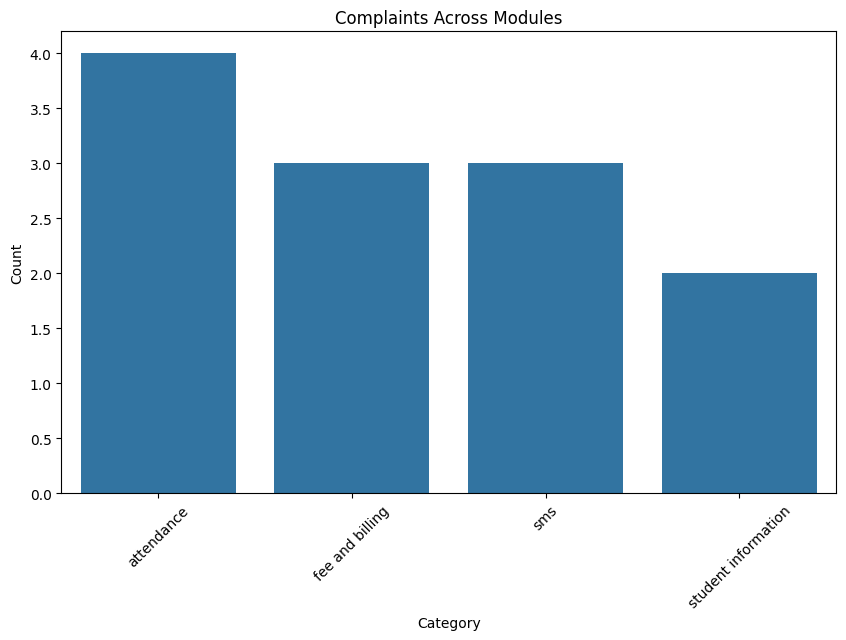

In [ ]:
#visualize data modulewise
category_counts = data['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, linewidth=0.1)
plt.title('Complaints Across Modules')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

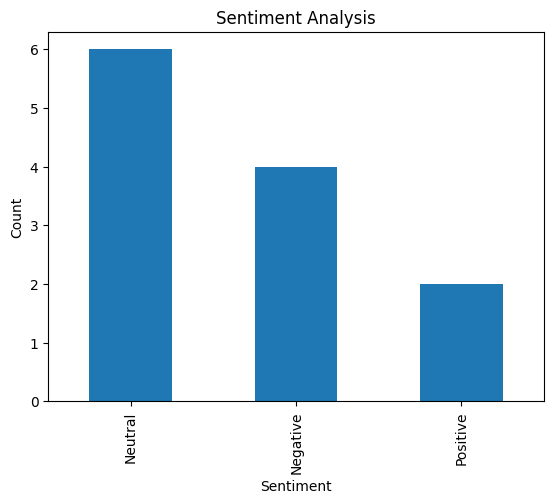

In [ ]:
#visualize sentiment analsysis count
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

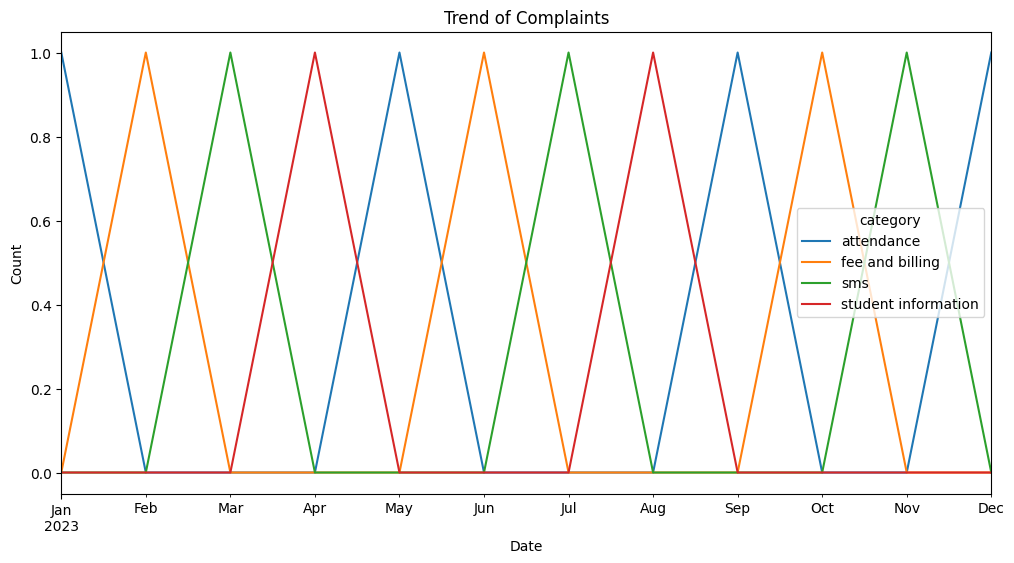

In [ ]:
#trend analysis to show trend of complaints over time
trend_data = data.groupby([data['date'].dt.to_period('M'), 'category']).size().unstack(fill_value=0)
trend_data.plot(kind='line', figsize=(12, 6))
plt.title('Trend of Complaints')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

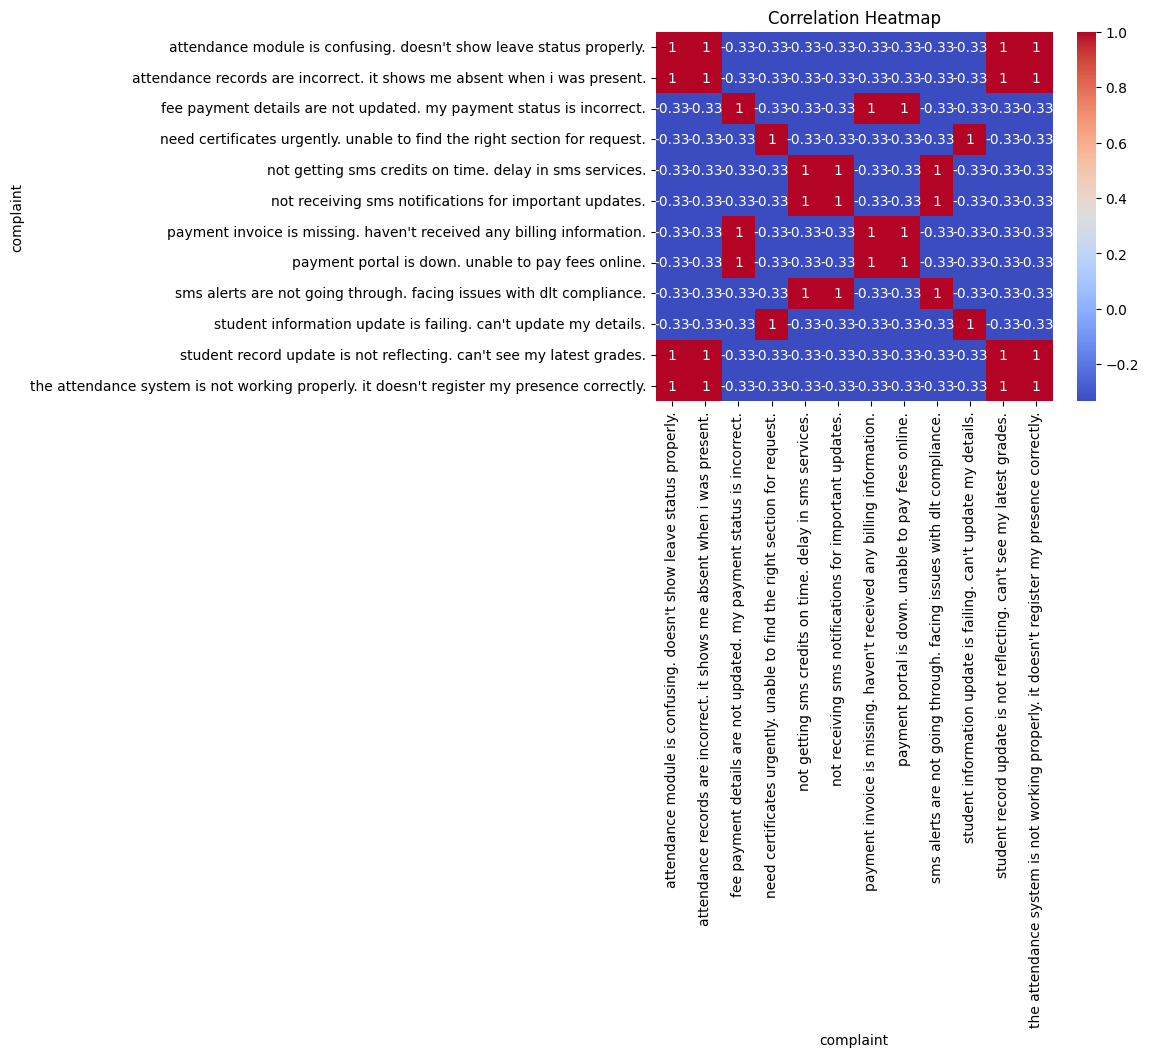

In [ ]:
#heatmap to show correlation between number of complaints in different modules
correlation_data = data.groupby(['category', 'complaint']).size().unstack(fill_value=0)
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

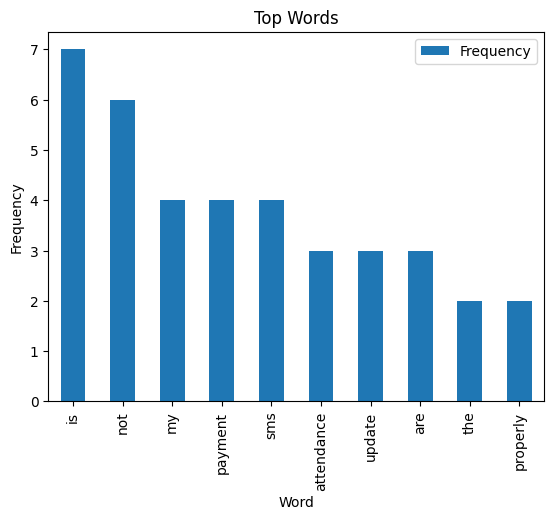

In [ ]:
#frequency analysis
def get_top_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus) #converts collection of text document to token counts, .fit(corpus) learns vocabulary
  bag_of_words = vec.transform(corpus) #creates sparse matrix where each row corresponds to a document and each column corresponds to a token(word)
  sum_words = bag_of_words.sum(axis=0) #sums up the frequency of each token across all documents
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] #creates a list of tuples where each tuple contins a word and its frequency
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) #sorts the list of tuples in descending order of frequency
  return words_freq[:n] #returns the top n words

top_words = get_top_words(data['complaint'], 10)
top_words_df = pd.DataFrame(top_words, columns=['word', 'Frequency'])

#plotting top words
top_words_df.plot(kind='bar', x='word', y='Frequency')
plt.title('Top Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Initial shape of data:  (12, 2)
Shape of data after cleaning : (12, 2)
['attendance' 'other']
Processing module: attendance


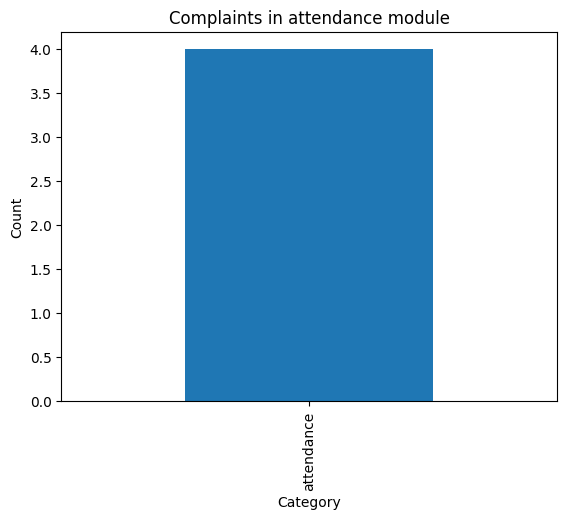

No data found for module: fee and billing
No data found for module: sms
No data found for module: student information


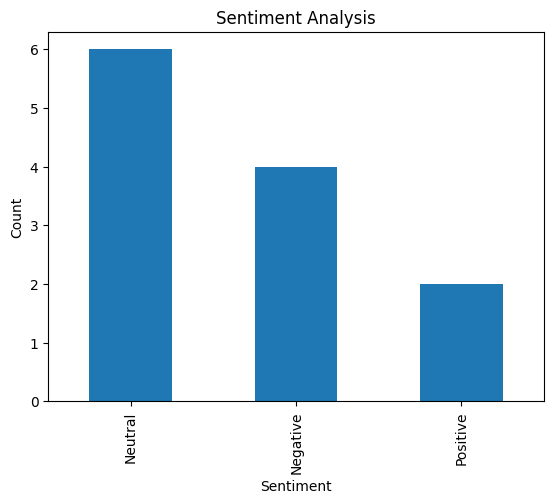

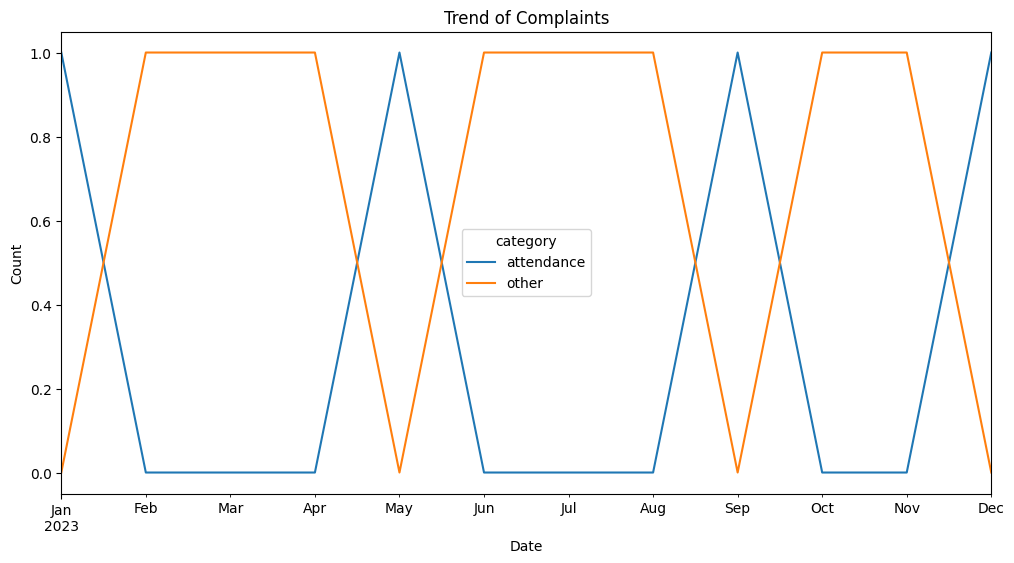

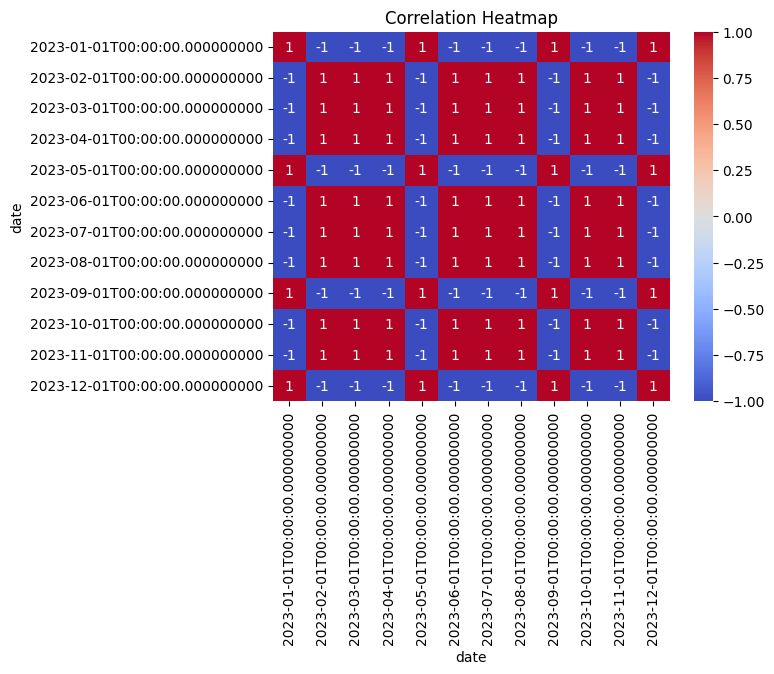

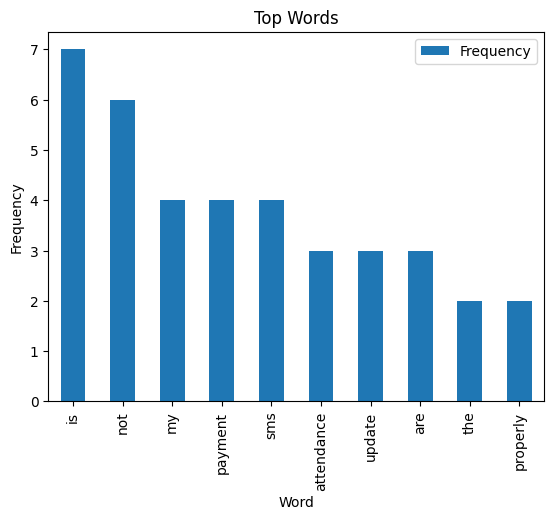

In [ ]:
import pandas as pd #for cleaning raw data
import matplotlib.pyplot as plt #visualizing data
from sklearn.feature_extraction.text import CountVectorizer #converting textual data into numeric data
from sklearn.naive_bayes import MultinomialNB #classifying complaints into categories
from sklearn.pipeline import make_pipeline #making models easily by pipelining conversion into numeric data and classification into categories
from sklearn.model_selection import train_test_split #splitting into training and testing datasets
from sklearn.metrics import classification_report #evaluating model's performance using F1 score, accuracy
from textblob import TextBlob #for sentiment analysis
import seaborn as sns #visualizing data
#load raw dataset of complaints(csv)
data = pd.read_csv('complaintsSample.csv')
data.head()
print("Initial shape of data: ", data.shape)
#cleaning of data
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data['date'] = pd.to_datetime(data['date'])
data['complaint'] = data['complaint'].str.lower()
print("Shape of data after cleaning :", data.shape)
#defining modules and keywords
modules = {
    'attendance': ['attendance', 'absent', 'present', 'leave', 'late', 'attendance record'],
    'fee and billing': ['payment', 'defaulter', 'billing', 'fee', 'invoice'],
    'sms': ['sms', 'email', 'whatsapp', 'dlt', 'sms credit'],
    'student information': ['certificates', 'student details', 'update', 'student record']
}

#categorize data based on keywords
def categorize(text):
  text_lower = text.lower()
  for module, keywords in modules.items():
    for keyword in keywords:
      if keyword in text_lower:
        return module
    return 'other'

data['category'] = data['complaint'].apply(categorize)
print(data['category'].unique())
#trial sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['sentiment'] = data['complaint'].apply(get_sentiment)
#visualize data modulewise
for module in modules.keys():
  module_data = data[data['category'] == module]
  if not module_data.empty:
    print(f"Processing module: {module}")
    categories = module_data['category'].value_counts()
    categories.plot(kind='bar')
    plt.title(f'Complaints in {module} module')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()
    #sentiment analysis within each module
    sentiment_data = module_data['sentiment'].value_counts()
    sentiment_data.plot(kind='bar')
    plt.title(f'Sentiment Analysis in {module} module')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
  else:
        print(f"No data found for module: {module}")
#visualize sentiment analsysis count
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
#trend analysis to show trend of complaints over time
trend_data = data.groupby([data['date'].dt.to_period('M'), 'category']).size().unstack(fill_value=0)
trend_data.plot(kind='line', figsize=(12, 6))
plt.title('Trend of Complaints')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()
#heatmap to show correlation between number of complaints in different modules
correlation_data = data.groupby(['category', 'date']).size().unstack(fill_value=0)
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#frequency analysis
def get_top_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus) #converts collection of text document to token counts, .fit(corpus) learns vocabulary
  bag_of_words = vec.transform(corpus) #creates sparse matrix where each row corresponds to a document and each column corresponds to a token(word)
  sum_words = bag_of_words.sum(axis=0) #sums up the frequency of each token across all documents
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] #creates a list of tuples where each tuple contins a word and its frequency
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) #sorts the list of tuples in descending order of frequency
  return words_freq[:n] #returns the top n words

top_words = get_top_words(data['complaint'], 10)
top_words_df = pd.DataFrame(top_words, columns=['word', 'Frequency'])

#plotting top words
top_words_df.plot(kind='bar', x='word', y='Frequency')
plt.title('Top Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()